<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2109 non-null   object
 1   Sentiment  2109 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.1+ KB


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

{'C': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}
0.957188498402556
The accuracy of the model is: 0.9501915708812261
The prediction result of this review is: positive


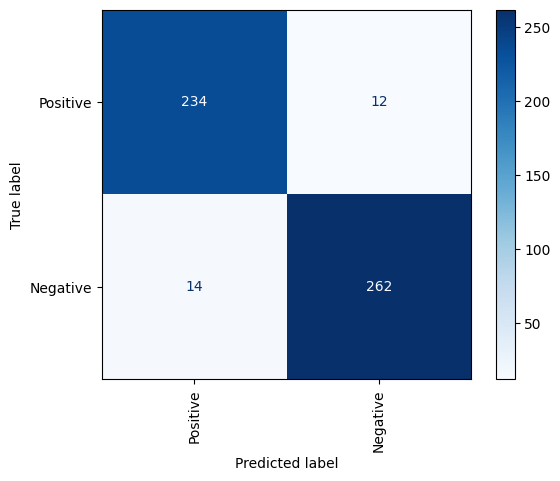

In [53]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import os

# Here you change the reviews
text = 'Adayala road is clear'

def predictReview(text_string):
  score=model.predict_proba(vectorizer.transform([text]))[0][1]

  if score >0.5:
    attitude='negative'
  else:
    attitude='positive'
  print('The prediction result of this review is: '+ attitude)

def doGridSearch(est, param_grid, cross_v):
  #`grid_search` performs a grid search with x-fold cross-validation and evaluates the models based on accuracy. Returns the best scoring model
  grid_search = GridSearchCV(estimator=est, param_grid=param_grid, cv=cross_v, scoring='accuracy')
  grid_search.fit(x_train_vectorized, y_train)
  print(grid_search.best_params_)
  print(grid_search.best_score_)
  return grid_search.best_estimator_

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'
df = pd.read_csv(url)
df.info()
df.head(5)

#Category verifciation
df = df.drop_duplicates()
df.groupby('Sentiment').describe()

vectorizer = TfidfVectorizer(
    min_df=20,
    norm='l2',
    smooth_idf=True,
    use_idf=True,
    ngram_range=(1, 1),
    stop_words='english'
    )

# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=21)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# Models
#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
#LR
model = LogisticRegression(max_iter=1000, random_state=21)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [50, 100, 250, 500, 750, 1000],
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'penalty':['l1','l2','elasticnet','none'],
}

#XGBoost
# model =  XGBClassifier()
# param_grid = {
#     'learning_rate': [0.1, 0.15, 0.2, 0.25],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [2, 3, 4],
#     'reg_alpha': [0.5, 1, 2],
#     'reg_lambda': [1, 2, 4]
#     }

#A grid search is preformed identifying the best parameters
model = doGridSearch(model, param_grid, 5)

#Confusion matrix
cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))



